# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**
Como el problema se refiere a predecir el precio de venta de un inmueble creo que son necesarios los siquientes datos:
- Datos sobre el estado fisico del inmueble: Sus dimensiones, cuantos pisos tiene, la ciudad en la que esta, sus antiguedad, numero de habitaciones, su dirección, tipo de propiedad (bodega, terreno baldio, inmueble urbano, establecimiento de comercio)
- Datos dinerarios de inmuebles: Precio y fecha de ventas anteriores, precio de los servicios publicos del lugar (tal vez), precio de arrendamiento.
- Datos con relación más indirecta (muy suplementarios): Epoca del año, hace cuanto tiempo lleva listado en venta la propiedad, mencion del inmueble en los medios (para propiedades importantes), nombre del constructor del bien (porpiedades especiales), numero de fotos que tiene el inmueble.

Generalmente entre más datos bien documentados es mejor el modelo. Pero por ejemplo si hay muchos datos y no se dice de que ciudad son o su direccion estos datos podrían ser perniciosos para el modelo por que las ciudades tiene por lo general diferentes dinamicas de precios. 




---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [14]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [15]:
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
#Imprimir el numero de filas no vacias
print(f'Numero de filas {df[df.columns[0]].count()}')
# Imprimir las cinco primeras filas
df.head()

Numero de filas 146660


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [16]:
# Otra forma de ver el numero de filas y el de columnas
f, c = df.shape
print(f'El numero de filas es {f} y el de columnas {c}')
# Ahora vemos el nombre de las columnas
columnas = list(df.columns.values)
columnas

El numero de filas es 146660 y el de columnas 19


['start_date',
 'end_date',
 'created_on',
 'lat',
 'lon',
 'l1',
 'l2',
 'l3',
 'rooms',
 'bedrooms',
 'bathrooms',
 'surface_total',
 'surface_covered',
 'price',
 'currency',
 'title',
 'description',
 'property_type',
 'operation_type']

In [17]:
# Funcion para describir de manera superficial el data set
df.describe()


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [18]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
for i, x in enumerate(columnas):
    porcentaje_de_nan = (df[x].isna().sum() / df[x].count()) * 100
    porcentaje_de_nan = round(porcentaje_de_nan, 2)
    print(f'En la columna {i+1}:"{x}" hay {df[x].isna().sum()} ({porcentaje_de_nan}%) valores NaN')


En la columna 1:"start_date" hay 0 (0.0%) valores NaN
En la columna 2:"end_date" hay 0 (0.0%) valores NaN
En la columna 3:"created_on" hay 0 (0.0%) valores NaN
En la columna 4:"lat" hay 9925 (7.26%) valores NaN
En la columna 5:"lon" hay 9959 (7.29%) valores NaN
En la columna 6:"l1" hay 0 (0.0%) valores NaN
En la columna 7:"l2" hay 0 (0.0%) valores NaN
En la columna 8:"l3" hay 0 (0.0%) valores NaN
En la columna 9:"rooms" hay 0 (0.0%) valores NaN
En la columna 10:"bedrooms" hay 0 (0.0%) valores NaN
En la columna 11:"bathrooms" hay 5957 (4.23%) valores NaN
En la columna 12:"surface_total" hay 20527 (16.27%) valores NaN
En la columna 13:"surface_covered" hay 21614 (17.28%) valores NaN
En la columna 14:"price" hay 0 (0.0%) valores NaN
En la columna 15:"currency" hay 0 (0.0%) valores NaN
En la columna 16:"title" hay 0 (0.0%) valores NaN
En la columna 17:"description" hay 0 (0.0%) valores NaN
En la columna 18:"property_type" hay 0 (0.0%) valores NaN
En la columna 19:"operation_type" hay 0 (0.

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

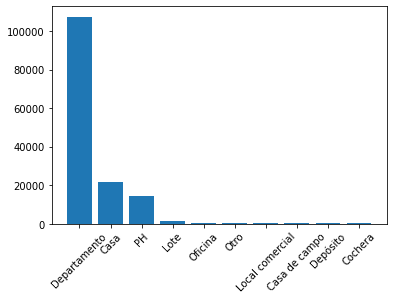

In [19]:
'''
Se observa la distribucion de tipos de propiedades en el dataset
'''
x = df['property_type'].value_counts()
#thing.plot(kind="bar")
X = x.index
y = x.values
plt.bar(X,y)
plt.xticks(rotation=45)
plt.show()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

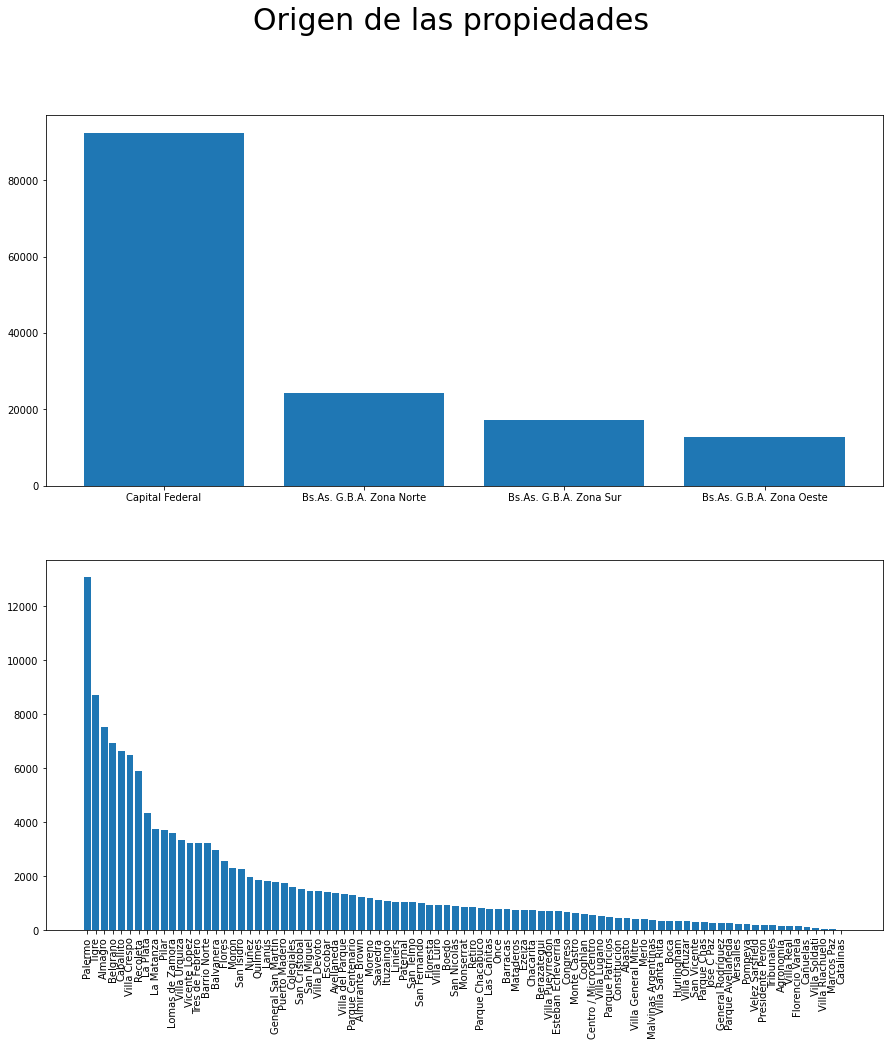

In [20]:
'''
grafica 1: la distribucion del numero de propiedades por regiones "l2"
grafica 2: La distribucion del numero de propiedades por zonas "l3" de "Capital Federal"
'''
fig, (ax1, ax2) = plt.subplots(2, figsize=[15, 15])
fig.suptitle('Origen de las propiedades', fontsize=30)
p1 = df.l2.value_counts()
p2 = df.l3.value_counts()[:]
plt.xticks(rotation=90)
ax1.bar(p1.index, p1.values)
ax2.bar(p2.index, p2.values)
plt.show()

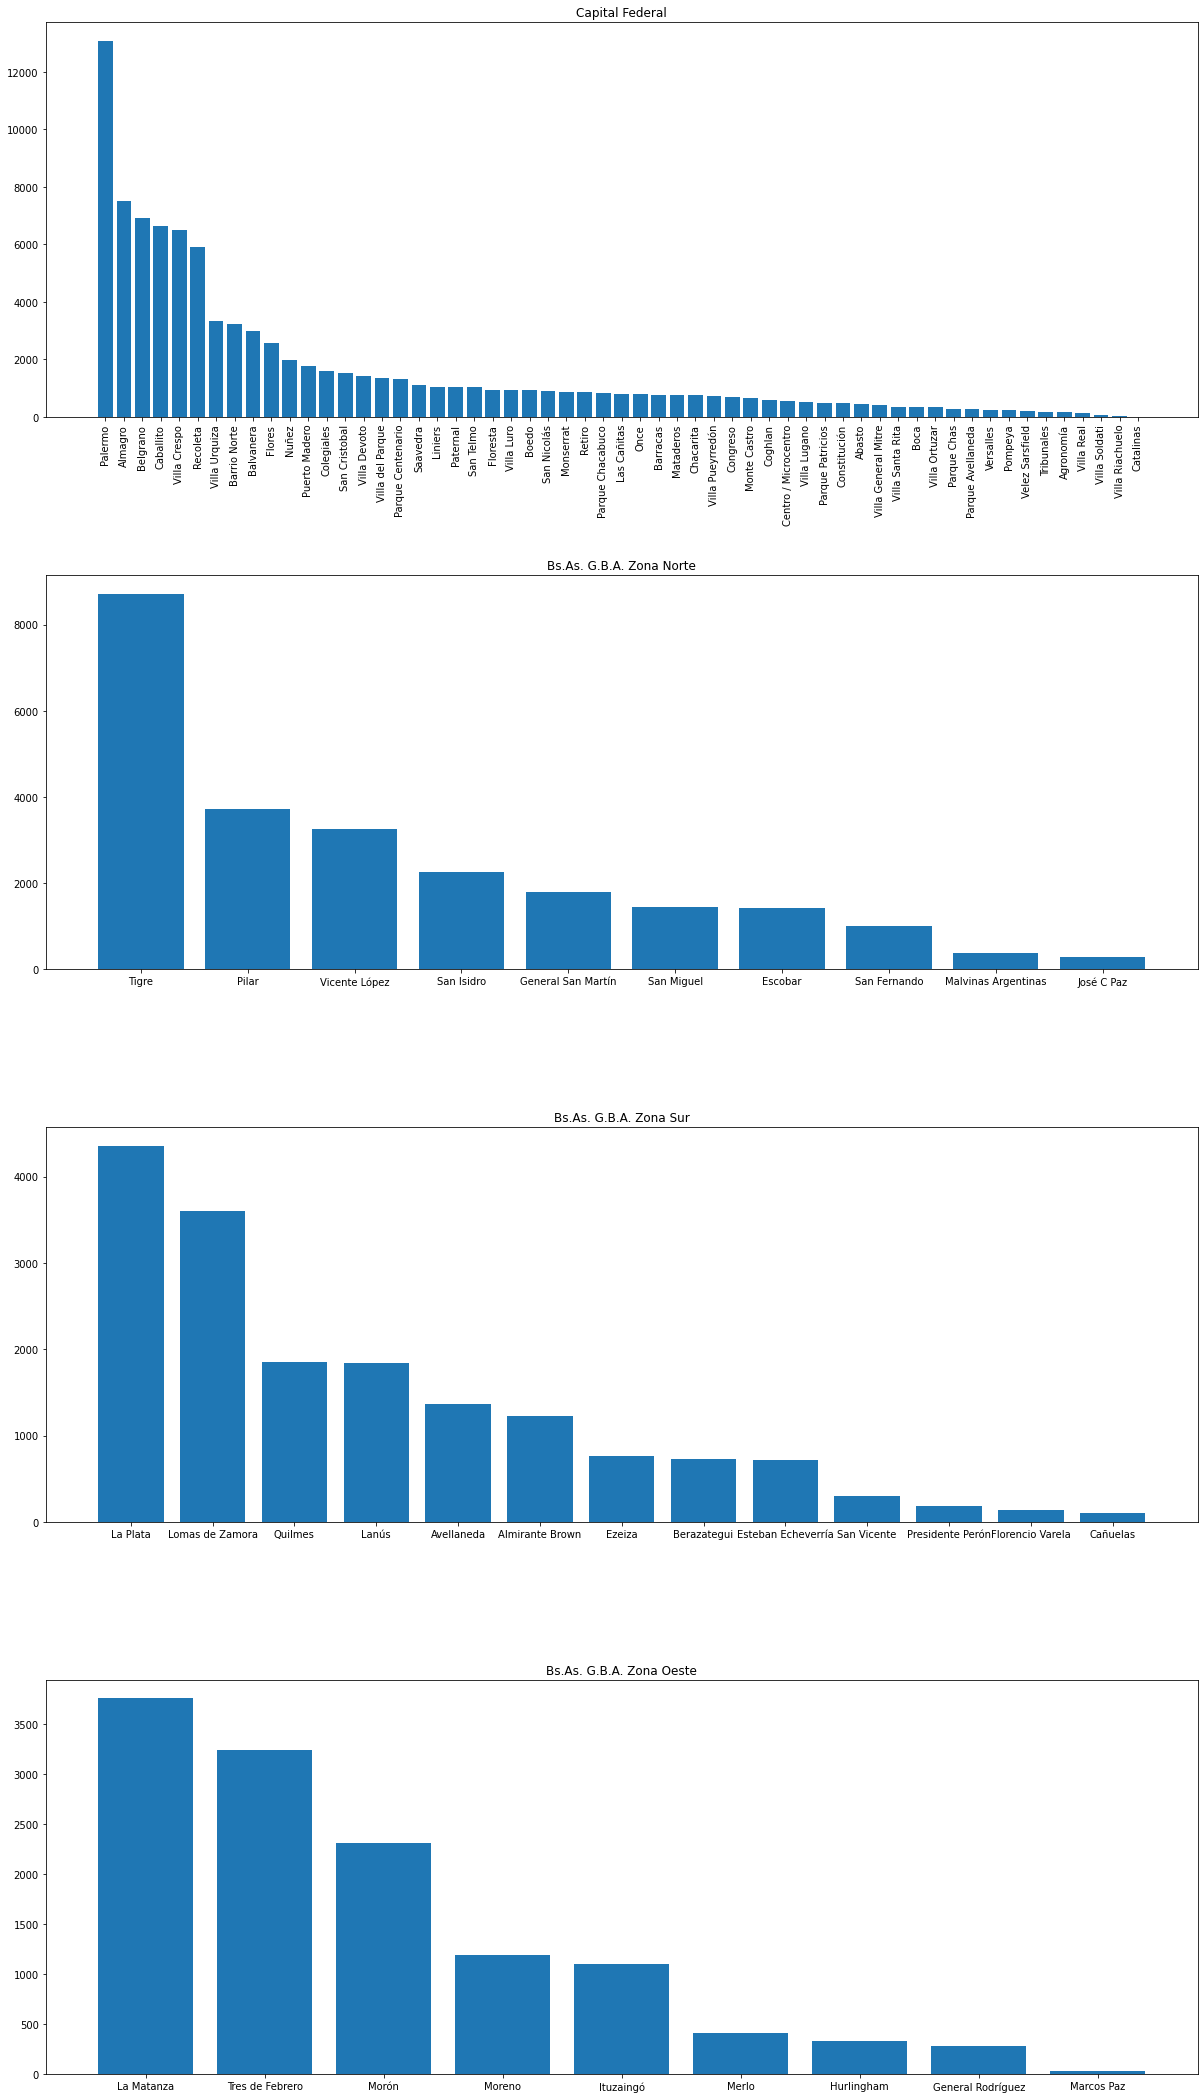

In [21]:
'''
EL numero de propiedades por zona ('l3') de cada region ('l2')
'''
regiones_grandes_nombres = df['l2'].value_counts().index
regiones_grandes_cuentas = df['l2'].value_counts().values

fig, ax = plt.subplots((len(regiones_grandes_nombres)), figsize=[20, 15])
fig.tight_layout()
# Loop para dibuajr los subplots por cada regios
for i, region in enumerate(regiones_grandes_nombres):
    filtrado = df[(df.l2 == region)]
    valores = filtrado.l3.value_counts()
    # poner los del primer grafico verticales por que son muchos barrios
    ax[0].tick_params('x',rotation=90)
    ax[i].title.set_text(region)
    ax[i].bar(valores.index, valores.values)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [22]:
tipos_pro = df.property_type.value_counts()[:3].index
max_region = 'Capital Federal'

df2 = df[(df.l2 == max_region) & (df['property_type'].isin(tipos_pro))]
df3 = df2
df2.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

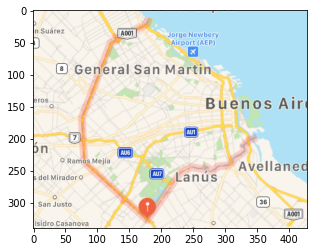

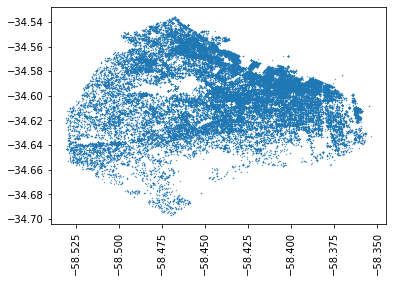

In [23]:
'''
Mapa de la distribucion geografica de las propiedades del data set usando lat y lon,
y un mapa de buenos aires para comparar.
'''
import matplotlib.image as mpimg
img = mpimg.imread('map.png')
plt.imshow(img)
plt.show()
plt.scatter(df2.lon,df2.lat, s= 0.1)
plt.xticks(rotation=90)
plt.show()

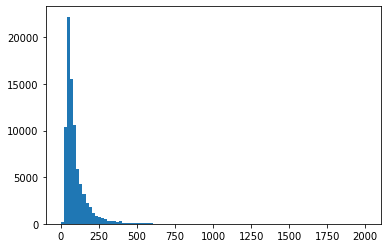

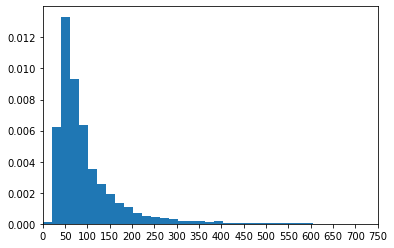

'\nDe acuerdo con los anteriores graficos voy a tomar los valores de superficie total solo de\n0 a 600 por que los demas son outliers que hacen dificil la visualizacion\n'

In [24]:
import numpy as np
# A. funcion para una primera aproximacion estadistica
'''
El grafico muestra que la superficie total de las propiedades tiene la forma de
una "Power law".
'''
df2.describe()
    # los datos estadisticos del describe ayudan bastante a tener una idea pero por ejemplo la variable count no dice mucho.
# B. 
df2.surface_total.mean()
x = df2.surface_total.values
plt.hist(x, bins=(np.linspace(0,2000, 100)))
plt.show()
    #b
plt.xlim([0,750])
plt.hist(x, bins=(np.linspace(0,2000, 100)), density=True)
plt.xticks((np.arange(0,800, 50)))
plt.show()
'''
De acuerdo con los anteriores graficos voy a tomar los valores de superficie total solo de
0 a 600 por que los demas son outliers que hacen dificil la visualizacion
'''


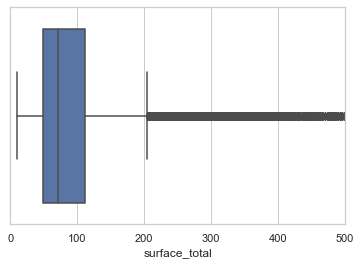

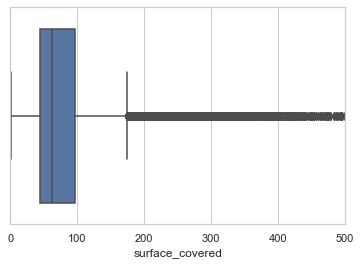

In [25]:
# B
# Voy a visualizar los datos con un box plot
## Box plot de surface_total
sns.set_theme(style="whitegrid")
sns.boxplot(x=df2.surface_total)
plt.xlim(0,500)
plt.show()

## Box plot de surface_covered
sns.boxplot(x=df2.surface_covered)
plt.xlim(0,500)

'''
Aqui en este box plot podemos ver mas como los valores de las columnas 'Surface total' y 'Surface_covered' 
se distribuyen principalmente de 0 a 200, siendo los otros valores outliers. 
De igual forma continuaré con un range de 0 a 500 para tomar en cuenta los valores
outliers de la cola de la grafica, por que el modelo necesita tambien ser capaz de 
contener valores que aunque pueden ser outliers tienen suficientes valores para darle 
sustancia al modelo
'''
# Ignorar esto ultimo
t=100

In [26]:
# Aqui filtro los valores en el range de surface_total de 0 a 500
df2 = df2[df2['surface_total'].between(0,500, inclusive=True)]

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [27]:
# Saco las variable de longitud y latitud
dfcor = df2[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]

# Buscar correlacion con el metodo de pandas
dfcor.corr(method='pearson')

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925932,0.589298,0.740054,0.288849,0.441248
bedrooms,0.925932,1.000000,0.590994,0.709681,0.276452,0.407702
bathrooms,0.589298,0.590994,1.000000,0.652602,0.256839,0.591039
surface_total,0.740054,0.709681,0.652602,1.000000,0.353329,0.638969
surface_covered,0.288849,0.276452,0.256839,0.353329,1.000000,0.260563
price,0.441248,0.407702,0.591039,0.638969,0.260563,1.000000


-----------------------------------------Departamento-------------------------------


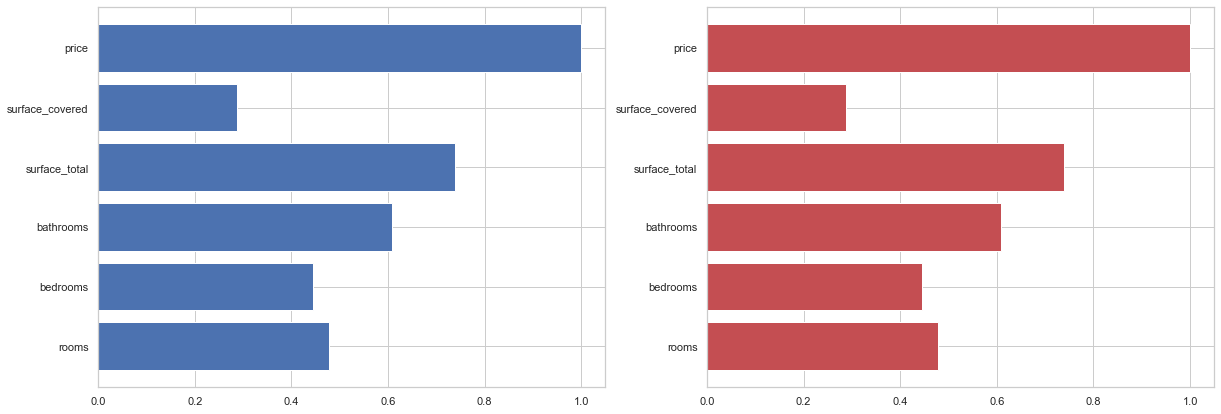

-----------------------------------------Casa-------------------------------


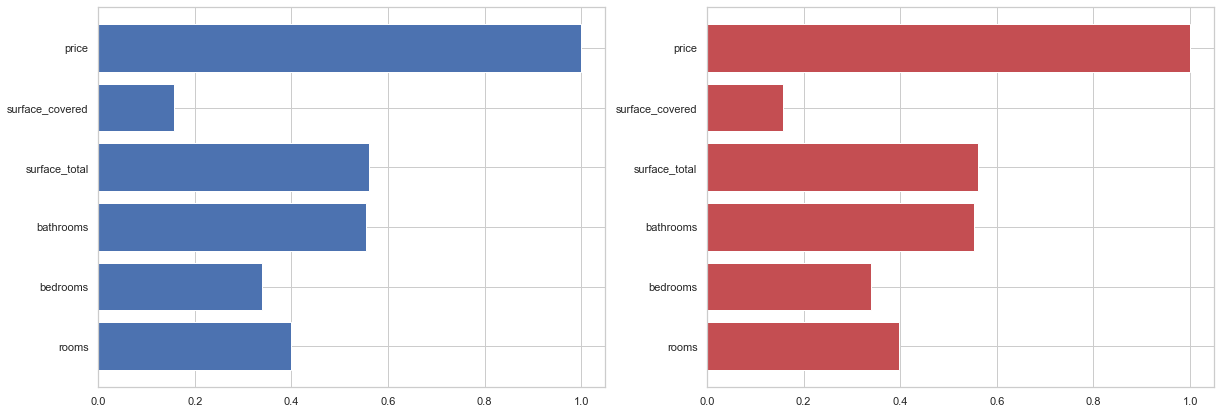

-----------------------------------------PH-------------------------------


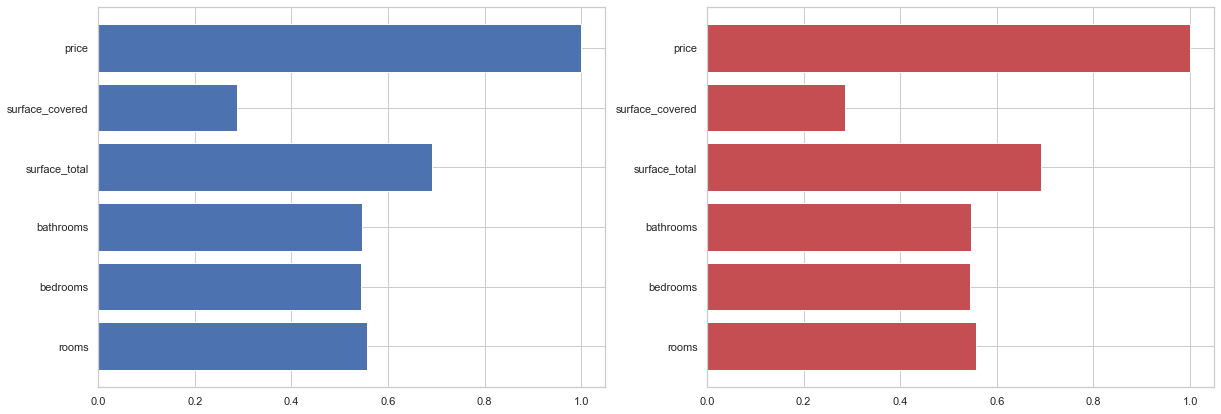

In [28]:
# Sacar correlacion para cada tipo de propiedad y se ponen en una lista
lista_p = [] # lista para la correlacion de pearson
lista_k = [] # lista para la correlacion de kendall
for x in tipos_pro:
    pearson = dfcor[df2['property_type']==x].corr(method='pearson')
    lista_p.append(pearson.price)
    kendall = dfcor[df2['property_type']==x].corr(method='kendall')
    lista_k.append(pearson.price)
    
'''Se grafica la correlacion de las features del datset con el metodo
de pearson (azul) y el metodo de kendall(rojo)'''
for i, x in enumerate(lista_p):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=[20,7])
    fig.title = tipos_pro[i] # no funcion
    print(f'-----------------------------------------{tipos_pro[i]}-------------------------------')
    ax1.barh(lista_p[i].index, lista_p[i].values)
    ax2.barh(lista_k[i].index, lista_k[i].values, color='r')
    plt.show()

# <font color='yellow'>Analisis de las graficas</font>
De las graficas de correlacion podemos ver que no hay muchas diferencia entre
usar el metodo de pearson o de kendall.
Tambien podemos ver que aunque la variable de superfice total es la mas importante 
para definir el precio, dependiendo del tipo de propiedad las otras variables tienen mas o 
menos peso.
    - En departamentos la segunda variable mas importante es el nuemro de baños
    - En casas el numero de baños es casi tan importante que la superficie total
    - En la propiedad horizontal las otras variables son todas igualmente importantes

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


<ipython-input-29-ef4794d0ed1d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price_m2'] = df2['price']/df2['surface_total']


<BarContainer object of 57 artists>

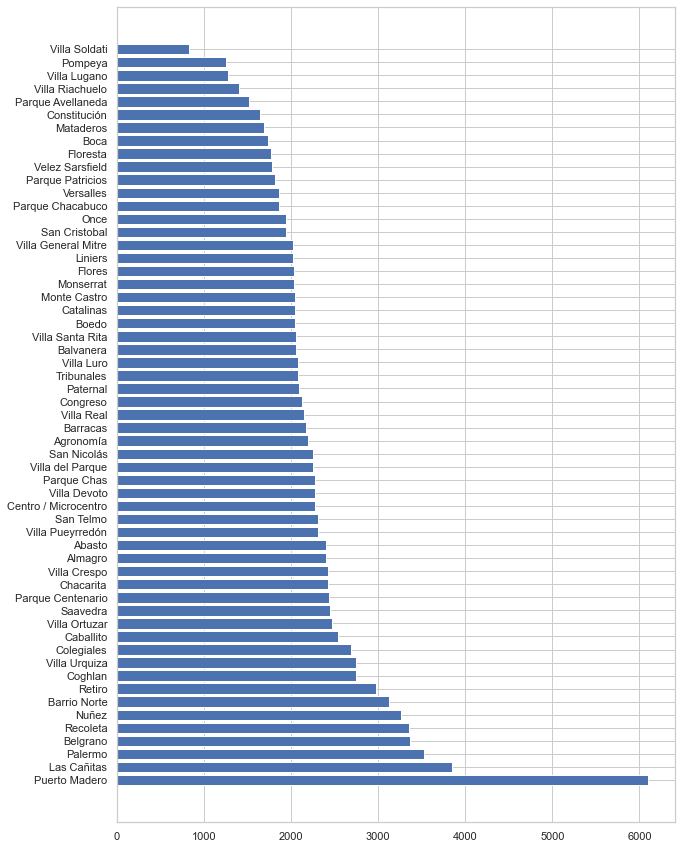

In [29]:
# Cual es el barrio mas caro de buenos aires?
# Creo una nueva columna donde este el precio por metro cuadrado
    # hago esto por que no me sirve de nada saber en que lugar estan los precios mas altos
    # por que puede sean simplemente casas mas grandes
'''
Graficos de las zonas (l3) de precio * metro cuadrado, de menor a mayor
'''
df2['price_m2'] = df2['price']/df2['surface_total']
#creo un data frame con el promedio de price_m2 para cada regio
dic = {}
for z in df2['l3'].value_counts().index:
    dic[z] = df2[df2.l3==z]['price_m2'].mean()
dic_sorted = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}
dc = pd.DataFrame(list(dic_sorted.items()), columns=['region','price_m2'])

# grafico
plt.figure(figsize=[10,15])
plt.barh(dc.region, dc.price_m2)

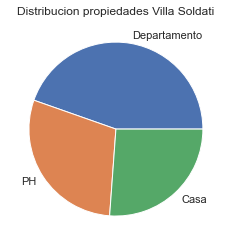

In [30]:
#Graficar la distribucion de propiedades de las propiedades de Villa soldati para ver 
#si algun tipo de propiedad es mas prevalente y eso mete un sezgo en los datos.
'''
Distribucion de los tipos de propiedad en villa soldati, esta distribucion parece
seguir la distribucion del dataset en general
'''
len(df2[df2['l3']=='Villa Soldati'])
dfv = df2[df2['l3']=='Villa Soldati']['property_type']
plt.title('Distribucion propiedades Villa Soldati')
xv = dfv.value_counts()
plt.pie(xv, labels=xv.index)
plt.show()

# <font color='yellow'> Resultados</font>
Por mucho Puerto madero es el barrio mas caro por metro cuadrado de argentina y villa Soldati es el mas barato.
Creo que es mas probable que haya un sesgo sobre el valor del barrio de Villa Soldati al ser el barrio con propiedades mas baratas, por que seguramente las personas con propiedades tan baratas las venden hablando con sus conocidos y pegando afiches en la propiedad. Ademas hay pocos datos de este barrio, solamente 69 propiedades


# <font color='yellow'>Preguntas para resolver</font>
#### 1.¿Que tanto influye el numero de habitaciones y baños en el precio de la propiedad
#### 2.¿Que tanto influye la superficie total en el precio de la propiedad?


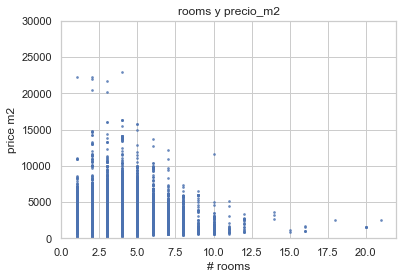

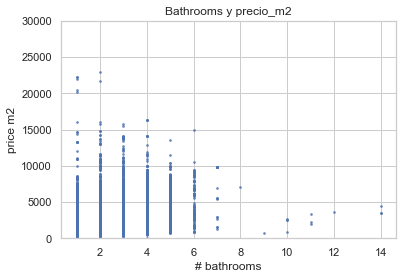

In [31]:
# Pregunta 1
dfrooms = df2[['bathrooms','bedrooms','rooms','price_m2','surface_total','price']]


# Ploteo con un limite para filtrar los outliers de la visualizacion
plt.title('rooms y precio_m2')
plt.scatter(dfrooms.rooms,dfrooms.price_m2, s=3, alpha=0.7)
plt.ylim([0,30000])
plt.xlabel('# rooms')
plt.ylabel('price m2')
plt.show()

#
plt.title('Bathrooms y precio_m2')
plt.scatter(dfrooms.bathrooms,dfrooms.price_m2, s=3, alpha=0.7)
plt.ylim([0,30000])
plt.xlabel('# bathrooms')
plt.ylabel('price m2')
plt.show()

'''
Segun los grafico el precio de la propiedad tiene una gran correlacion con el numero
de habitaciones hasta que desde 10 habitaciones ya no tiene tanta influencia sobre el 
precio por metro cuadrado. Lo que tiene sentido por que al ser las propiedades mas grandes
los valores de precio por m2 bajan (o si no serian excesivos el precio de la propiedad) y
deja de ser importante tener mas habitaciones.

Tambien se ve que el precio por metro cuadrado de la propiedad es mas grande en propiedades
de menos de 5 habitaciones. Seria tonto pensar que al una propiedad tener menos habitaciones
es causa de que cueste mas. Lo que nos puede decir este grafico es que las propiedades mas
caras por metro cuadrado tienen la caracteristica de tener menos habitacinfluyeiones

El grafico del numero de baños es similar al de numero de habitaciones, solo que nos dice
que las propiedades mas caras tienen por lo general uno o dos baños.
'''
z = 0

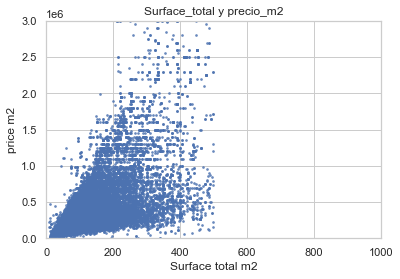

In [32]:
# Pregunta 2
plt.title('Surface_total y precio_m2')
plt.scatter(dfrooms.surface_total, dfrooms.price, s=3, alpha=0.7)
plt.ylim([0,3000000])
plt.xlim([0,1000])
plt.xlabel('Surface total m2')
plt.ylabel('price m2')
plt.show()
dfrooms.price.mean()

'''
Este grafico lo hice por que queria saber cual es entonces el factor que determina el precio.
Segun las graficas de correlacion superfice total es el mas importante de ellos, y lo que
podemos ver aqui es que eso es cierto, pero no parece una grafica de correlacion normal,
parece un cono.
Esta grafica nos dice que la correlacion entre la superficie total y el precio tiene un intervalo
en el que se mueve mas estrecho entre menor es la superficie total, pero a medida que
la superficie total aumenta los precios varian muchos mas
'''
z = 0

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

# <font color='yellow'> Limpieza de datos </font>

In [33]:
#1
df3 = df[(df['l2']=='Capital Federal') & (df['property_type'].isin(['Departamento', 'PH', 'Casa']))]
#2
df3 = df3[(df3['surface_total'] <= 1000) & (df3['surface_total']>= 15)]
#3
df3 = df3[df3['price']<= 4000000]
#4
df4 = df3[['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'property_type']]
df3 = df3[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'property_type']]
#5
df3 = df3.dropna()
df4 = df4.dropna()
df3.shape


(81019, 7)

In [34]:
# Limpieza de datos sospechosos
valores_sus = [42577,35960, 136930] #indices
# Busco valores sospechos al sortear por una columna especifica
df3.sort_values('price', ascending=False)[:20]
# Elimino los valores que tengan una surface_total menor que surface_covered. Son 743
df3 = df3[df3['surface_covered'] <= df3['surface_total']]
df4 = df4[df4['surface_covered'] <= df4['surface_total']]
df3.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [35]:
# convertir property_type a numeros
clean = {'property_type': {"Departamento":1, "Casa":2, "PH":3}}
# Las comento por que el cmabio ya ocurrio y si se activan sale error
df3 = df3.replace(clean)
df4 = df4.replace(clean)
df4.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,1
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,3
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,3
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,3
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,3


In [36]:
# limpieza de outliers que estan mas alla de 3 desviaciones standard en cada columna
print(len(df3))
from scipy import stats
df3 = df3[(np.abs(stats.zscore(df3)) < 3).all(axis=1)]
df4 = df4[(np.abs(stats.zscore(df4)) < 3).all(axis=1)]
print(len(df3))
df3

80276
76280


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,2.0,1.0,2.0,70.0,58.0,159000.0,3
2,2.0,1.0,1.0,45.0,45.0,125000.0,3
3,2.0,1.0,1.0,85.0,50.0,295000.0,3
5,2.0,1.0,1.0,56.0,56.0,150000.0,3
6,2.0,1.0,1.0,70.0,70.0,159500.0,3
...,...,...,...,...,...,...,...
146553,4.0,3.0,2.0,106.0,100.0,620000.0,1
146554,4.0,3.0,3.0,175.0,111.0,570000.0,3
146555,3.0,2.0,2.0,144.0,134.0,480000.0,3
146556,4.0,2.0,2.0,317.0,143.0,530000.0,3


In [37]:
# Importar las cosas
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Set up de los training and test sets

In [38]:
# departamento surface total bathrooms
# casa surface total bathrooms
# ph surface total rooms

# Voy a hacer modelos para cada tipo de propiedad

# Separar los valores. Voy a hacer un set de dos variables para cada tipo de propiedad.
# Departamentos
X_d = df3[df3['property_type']==1][['bathrooms','surface_total','rooms','bedrooms', 'surface_covered']]
y_d = df3[df3['property_type']==1].price
# Casas
X_c = df3[df3['property_type']==2][['bathrooms','surface_total','rooms','bedrooms', 'surface_covered']]
y_c = df3[df3['property_type']==2].price
# PH
X_p = df3[df3['property_type']==3][['bathrooms','surface_total','rooms','bedrooms', 'surface_covered']]
y_p = df3[df3['property_type']==3].price

# Variables de entreno y test
# Departamento
X_traind, X_testd, y_traind, y_testd = train_test_split(X_d, y_d, test_size=0.33, random_state=42)
# Casas
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_c, y_c, test_size=0.33, random_state=42)
# PH
X_trainp, X_testp, y_trainp, y_testp = train_test_split(X_p, y_p, test_size=0.33, random_state=42)

# Hacer un set con todas las variables por si acaso
X2 = df3.drop(['price','property_type'], axis=1)
y2 = df3.price
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

# Hacer un set con todas las variables por si acaso
X3 = df3[['bathrooms','surface_total']]
y3 = df3.price
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, random_state=42)


# Benchmarks

----------Benchamrk 3---------------
Raiz del error cuadratico medio:90058.91521120426


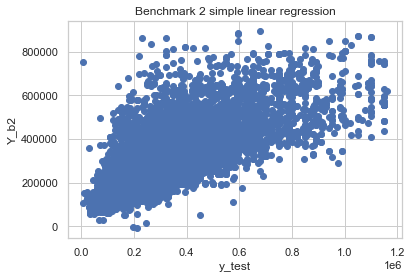

In [40]:
# Benchmark: Linear Regressor con input de todas las variables 
# sin separar por tipo de propiedad
'''
Grafico:
Scatterplot de y e y predecido. Estan correlacionados pero hay mucha varianza
'''
linea = LinearRegression()
linea.fit(X_train2, y_train2)
y_b2 = linea.predict(X_test2)
rmse_b2 = np.sqrt(mean_squared_error(y_test2, y_b2))
print('----------Benchamrk 3---------------')
print(f'Raiz del error cuadratico medio:{rmse_b2}')

plt.title('Benchmark 2 simple linear regression')
plt.scatter(y_test2, y_b2)
plt.xlabel('y_test')
plt.ylabel('Y_b2')
plt.show()

# Metricas
Como este es un problema de regresion y no de calificacion no se pueden usar metricas
como el accuracy score, roc, o f1.
La metrica que voy a usar es la raiz del error cuadrado promedio. Esta metrica consiste en la suma de la raiz cuadrada del error elevedado al cuadrado. Con el error me refiero a la diferencia de y real vs y predecida.
Es una buena metrica por que al estar elevada a la dos la magnitud de los errores afecta mas el despempeño de la metrica, mas que solamente sumando todos los errores.
Tambien es una buena metrica por que
No es de clasificacion, entonces no se usa accuracy
se usa la resta de 
se pronuncian mas los grandes errors
root para que este en la misma dimension que los datos

# <font color='yellow'> Modelos </font>

Voy a hacer modelos separando por cada tipo de propiedad
### Modelos Departamentos:
Tiene todas las variables como input pero esta separado por tipos de propiedades.
Son modelos de:
- Kneighbors
- Decision Tree


In [57]:
treed = DecisionTreeRegressor(max_depth=10)
neid = KNeighborsRegressor(n_neighbors=3)

treed.fit(X_traind, y_traind)
neid.fit(X_traind, y_traind)

y_pred_dept_tree = treed.predict(X_testd)
y_pred_dept_neid = neid.predict(X_testd)

errores_treed = y_testd - y_pred_dept_tree
errores_neid = y_testd - y_pred_dept_tree

El rmse del arbol es :76249.11413430341


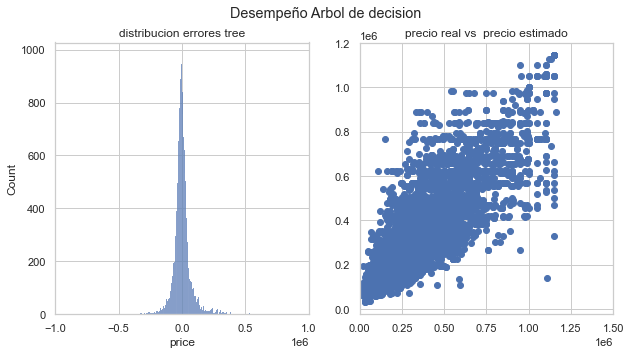

In [58]:
# Plots del desempeño del arbol de decision
'''
Grafico1: Distribucion de cada error (y_test - y_pred). Esta bien pues es simetrico
grafico2: scatterplot del precio real vs precio estimado
'''
rmse_treed = np.sqrt(mean_squared_error(y_testd, y_pred_dept_tree))
print(f'El rmse del arbol es :{rmse_treed}')
fig, axs = plt.subplots(1,2, figsize=[10,5])
fig.suptitle('Desempeño Arbol de decision')
r = sns.histplot(x=errores_treed, ax=axs[0])
r.set_xlim([-1000000,1000000])
axs[0].set_title('distribucion errores tree') 

plt.xlim([0,4500000])
axs[1].set_title('precio real vs  precio estimado')
axs[1].scatter(y_testd, y_pred_dept_tree)
axs[1].set_xlim([0,1500000])
plt.show()

el rms de knn es de 74600.39807597437


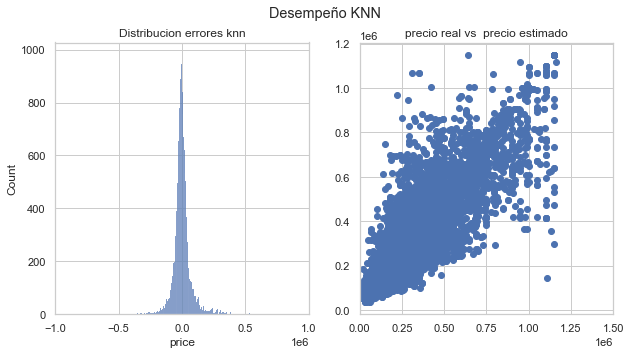

(0.0, 1.0)

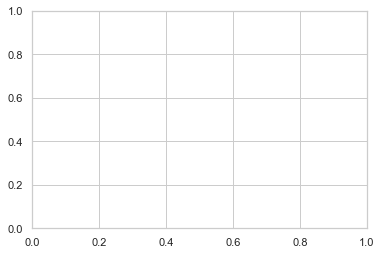

In [44]:
# Plots del KNN
'''
Grafico1: Distribucion de cada error (y_test - y_pred). simetrico asi que se supone
que esta bien
grafico2: scatterplot del precio real vs precio estimado
'''
rmse_neid = np.sqrt(mean_squared_error(y_testd, y_pred_dept_neid))
print(f'el rms de knn es de {rmse_neid}')
fig, axs = plt.subplots(1,2, figsize=[10,5])
fig.suptitle('Desempeño KNN')
r = sns.histplot(x=errores_neid, ax=axs[0])
r.set_xlim([-1000000,1000000])
axs[0].set_title('Distribucion errores knn') 

plt.xlim([0,4500000])
axs[1].set_title('precio real vs  precio estimado')
axs[1].scatter(y_testd, y_pred_dept_neid)
axs[1].set_xlim([0,1500000])
plt.show()
plt.xlim()

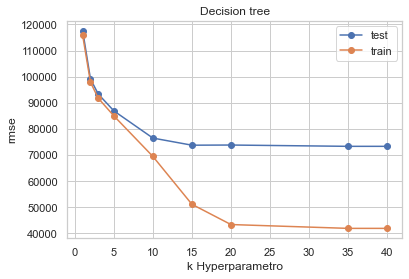

 el mejor rmse es de 73775.09470392841 cuando el arbol tiene 15 pisos


In [45]:
tree_list = [1,2,3,5,10,15,20,35,40]
lista_test = []
lista_train = []
'''
Grafico:
Plot del rmse (y) con base al hyperparametro k (x)
se observa que se estabiliza en el menor valor en 20
'''
for i in tree_list:
    tree2 = DecisionTreeRegressor(max_depth=i, random_state=42)
    tree2.fit(X_traind, y_traind)
    y_pred_tree2 = tree2.predict(X_testd)
    rmse_tree2 = np.sqrt(mean_squared_error(y_testd, y_pred_tree2))
    
    
    y_pred_tree2_train = tree2.predict(X_traind)
    rmse_tree2_train = np.sqrt(mean_squared_error(y_traind, y_pred_tree2_train))
    
    lista_test.append(rmse_tree2)
    lista_train.append(rmse_tree2_train)
plt.title('Decision tree')
plt.plot(tree_list, lista_test,'o-', label='test')
plt.plot(tree_list, lista_train, 'o-', label='train')
plt.xlabel('k Hyperparametro')
plt.ylabel('rmse')
plt.legend()
plt.show()
# 15 se ve como un buen numero de pisos para el arbol de decision
print(f' el mejor rmse es de {lista_test[5]} cuando el arbol tiene 15 pisos')

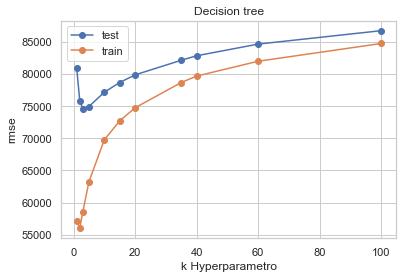

In [60]:
knn_list = [1,2,3,5,10,15,20,35,40,60, 100]
lista_test = []
lista_train = []
'''
Grafico:
Plot del rmse (y) con base al hyperparametro k (x)
se observa que el error aumenta de forma logaritmica a medida que se usan
mas k_neighbours
'''
for i in knn_list:
    knn2 = KNeighborsRegressor(n_neighbors=i)
    knn2.fit(X_traind, y_traind)
    y_pred_knn2 = knn2.predict(X_testd)
    rmse_knn2 = np.sqrt(mean_squared_error(y_testd, y_pred_knn2))
    
    
    y_pred_knn2_train = knn2.predict(X_traind)
    rmse_knn2_train = np.sqrt(mean_squared_error(y_traind, y_pred_knn2_train))
    
    lista_test.append(rmse_knn2)
    lista_train.append(rmse_knn2_train)
plt.title('Decision tree')
plt.plot(knn_list, lista_test,'o-', label='test')
plt.plot(knn_list, lista_train, 'o-', label='train')
plt.xlabel('k Hyperparametro')
plt.ylabel('rmse')
plt.legend()
plt.show()

## Concluciones parciales:
1.El modelo de decision tree está dando mejores resultados (un rmse mas bajo). mejor usaré ese tipo de modelo esa para las otras categorias de propiedad.

# Modelo casas
Modelo solo de decision trees

In [47]:
treec = DecisionTreeRegressor(max_depth=10)

treec.fit(X_trainc, y_trainc)

y_pred_casa_tree = treec.predict(X_testc)

errores_treec = y_testc - y_pred_casa_tree

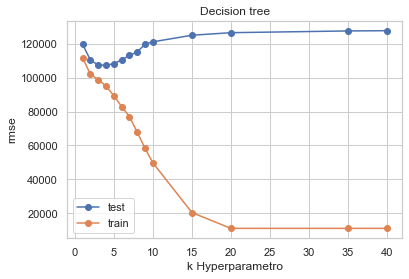

108242.91373115848

In [48]:
tree_list = [1,2,3,4,5,6,7,8,9,10,15,20,35,40]
lista_test = []
lista_train = []
'''
Grafico:
Plot del rmse (y) con base al hyperparametro profundidad el arbol (x)
se observa que se estabiliza en el valor de 20.
Hay gran discrepancia entre el training y test set
'''
for i in tree_list:
    tree3 = DecisionTreeRegressor(max_depth=i)
    tree3.fit(X_trainc, y_trainc)
    y_pred_tree3 = tree3.predict(X_testc)
    rmse_tree3 = np.sqrt(mean_squared_error(y_testc, y_pred_tree3))
    
    
    y_pred_tree3_train = tree3.predict(X_trainc)
    rmse_tree3_train = np.sqrt(mean_squared_error(y_trainc, y_pred_tree3_train))
    
    lista_test.append(rmse_tree3)
    lista_train.append(rmse_tree3_train)
plt.title('Decision tree')
plt.plot(tree_list, lista_test,'o-', label='test')
plt.plot(tree_list, lista_train, 'o-', label='train')
plt.xlabel('k Hyperparametro')
plt.ylabel('rmse')
plt.legend()
plt.show()
lista_test[4]

# Modelo PH
Solo decision tree

In [49]:
treep = DecisionTreeRegressor(max_depth=10)

treep.fit(X_trainp, y_trainp)

y_pred_ph_tree = treep.predict(X_testp)

errores_treep = y_testp - y_pred_ph_tree

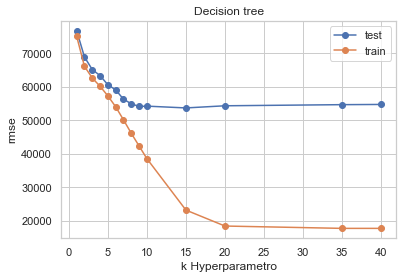

60607.69343141156

In [50]:
tree_list = [1,2,3,4,5,6,7,8,9,10,15,20,35,40]
lista_test = []
lista_train = []
'''
Grafico:
Plot del rmse (y) con base al hyperparametro depth (x)
se observa que se estabiliza en el valor de 20 para el hyperparametro
'''
for i in tree_list:
    tree3 = DecisionTreeRegressor(max_depth=i)
    tree3.fit(X_trainp, y_trainp)
    y_pred_tree3 = tree3.predict(X_testp)
    rmse_tree3 = np.sqrt(mean_squared_error(y_testp, y_pred_tree3))
    
    
    y_pred_tree3_train = tree3.predict(X_trainp)
    rmse_tree3_train = np.sqrt(mean_squared_error(y_trainp, y_pred_tree3_train))
    
    lista_test.append(rmse_tree3)
    lista_train.append(rmse_tree3_train)
plt.title('Decision tree')
plt.plot(tree_list, lista_test,'o-', label='test')
plt.plot(tree_list, lista_train, 'o-', label='train')
plt.legend()
plt.xlabel('k Hyperparametro')
plt.ylabel('rmse')
plt.show()
lista_test[4]
# El mejor es 10 de hiper parametro

# Mejores modelos parciales

In [51]:
tree_depto = DecisionTreeRegressor(max_depth=15)
tree_depto.fit(X_traind, y_traind)

tree_casas = DecisionTreeRegressor(max_depth=5)
tree_casas.fit(X_trainc, y_trainc)

tree_ph = DecisionTreeRegressor(max_depth=10)
tree_ph.fit(X_trainp, y_trainp)

DecisionTreeRegressor(max_depth=10)

# Prueba de arbol de decision regressor con variables clusters
Voy a usar las variables de Latitud y Longitud que estan en el data set para entrenar el modelo, para ver si el modelo tiene un mejor desempeño. Pero primero voy a hacer un modelo que estè entrenado con los datos de la variable categorica de localidad (l3), para compararlo con el metodo de crear clusters con las latitutes

In [52]:
# cambiando las variables categoricas del dataset a variables numericas
r = df2.dropna()
X4 = r[['l3',
         'rooms',
         'bathrooms',
         'surface_total',
         'price',
         'property_type']]

X4 = pd.get_dummies(data=X4, columns=['l3','property_type'])

# Preparando los training and test sets
y4 = r.price_m2
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.33, random_state=42)


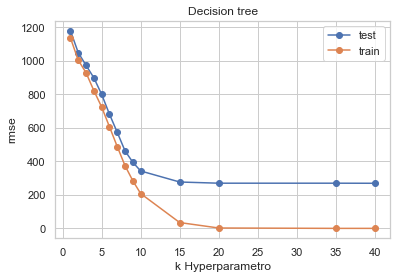

punto con error cuadrado mas bajo 276.89536183995915


In [53]:
# buscando el mejor hiperparametro
#arbolo = DecisionTreeRegressor(max_depth=15).fit(X_train4, y_train4)

tree_list = [1,2,3,4,5,6,7,8,9,10,15,20,35,40]
lista_test = []
lista_train = []
'''
Plot del hyperparameto (profundidad del arbol maxima) con el erro cuadrado promedio
'''
for i in tree_list:
    tree4 = DecisionTreeRegressor(max_depth=i)
    tree4.fit(X_train4, y_train4)
    y_pred_tree4 = tree4.predict(X_test4)
    rmse_tree4 = np.sqrt(mean_squared_error(y_test4, y_pred_tree4))
    
    
    y_pred_tree4_train = tree4.predict(X_train4)
    rmse_tree4_train = np.sqrt(mean_squared_error(y_train4, y_pred_tree4_train))
    
    lista_test.append(rmse_tree4)
    lista_train.append(rmse_tree4_train)
plt.title('Decision tree')
plt.plot(tree_list, lista_test,'o-', label='test')
plt.plot(tree_list, lista_train, 'o-', label='train')
plt.xlabel('k Hyperparametro')
plt.ylabel('rmse')
plt.legend()
plt.show()
print(f'punto con error cuadrado mas bajo {lista_test[-4]}')


# Modelo de arbol de decision con las variables de Lon y Lat
Voy a usar las variables de Latitud y Longitud que estan en el data set para entrenar el modelo, para ver si el modelo tiene un mejor desempeño

In [54]:
# Usar los datos de longitud y latitud
# Variable with the Longitude and Latitude
df4["id"] = df4.index + 1
Z = df4.loc[:,['id','lat','lon']]
Z.head(10)

,id,lat,lon
1,2,-34.624056,-58.412110
2,3,-34.593569,-58.427474
3,4,-34.581294,-58.436754
5,6,-34.593779,-58.441239
6,7,-34.600988,-58.433061
7,8,-34.600988,-58.433061
8,9,-34.639598,-58.419612
9,10,-34.639598,-58.419612
10,11,-34.586225,-58.496220
11,12,-34.603683,-58.381557


In [61]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 100, init ='k-means++')
kmeans.fit(Z[Z.columns[1:3]]) # Compute k-means clustering
Z['cluster_label'] = kmeans.fit_predict(Z[Z.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(Z[Z.columns[1:3]]) # Labels of each point
Z.head(6)

,id,lat,lon,cluster_label
1,2,-34.624056,-58.412110,52
2,3,-34.593569,-58.427474,19
3,4,-34.581294,-58.436754,71
5,6,-34.593779,-58.441239,44
6,7,-34.600988,-58.433061,87
7,8,-34.600988,-58.433061,87


In [62]:
#Unir los clusters
df5 = df4.copy()
Z = Z[['id','cluster_label']]
df5 = df5.merge(Z, left_on="id", right_on="id")
df5 = df5.drop('id',axis=1)
df5.head(10)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,cluster_label
0,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,3,52
1,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,3,19
2,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,3,71
3,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,3,44
4,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,159500.0,3,87
5,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,159500.0,3,87
6,-34.639598,-58.419612,1.0,1.0,1.0,45.0,37.0,89000.0,3,12
7,-34.639598,-58.419612,1.0,1.0,1.0,45.0,37.0,89000.0,3,12
8,-34.586225,-58.496220,2.0,1.0,2.0,66.0,49.0,170000.0,3,27
9,-34.603683,-58.381557,2.0,1.0,1.0,68.0,59.0,149000.0,1,58


In [63]:
#Preparacion variables de test y train
X = df5[['rooms','cluster_label','bathrooms', 'surface_total','property_type']]
X = pd.get_dummies(data=X, columns=['cluster_label'])
y = df5.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [64]:
tree_final = DecisionTreeRegressor(max_depth=15)
tree_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15)

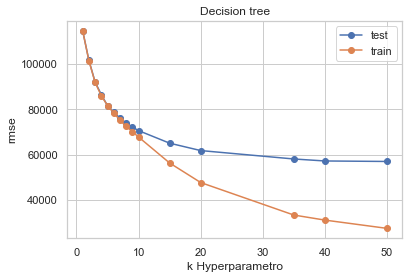

mejor valor con profundidad de 50: 56969.54327117422


In [66]:
tree_list = [1,2,3,4,5,6,7,8,9,10,15,20,35,40,50]
lista_test = []
lista_train = []
for i in tree_list:
    tree3 = DecisionTreeRegressor(max_depth=i)
    tree3.fit(X_train, y_train)
    y_pred_tree3 = tree3.predict(X_test)
    rmse_tree3 = np.sqrt(mean_squared_error(y_test, y_pred_tree3))
    
    
    y_pred_tree3_train = tree3.predict(X_train)
    rmse_tree3_train = np.sqrt(mean_squared_error(y_train, y_pred_tree3_train))
    
    lista_test.append(rmse_tree3)
    lista_train.append(rmse_tree3_train)
plt.title('Decision tree')
plt.plot(tree_list, lista_test,'o-', label='test')
plt.plot(tree_list, lista_train, 'o-', label='train')
plt.xlabel('k Hyperparametro')
plt.ylabel('rmse')
plt.legend()
plt.show()
print(f'mejor valor con profundidad de {tree_list[-1]}: {lista_test[-1]}')

# Conclusion
1. El valor del error cuadrado promedio con la metodologia de clusters se desempeño mucho peor que el modelo que usò simplemente la variable de barrios.
2. El mejor modelo fue el DecisionTreeRegressor con un desempeño muy superior de rmse de 275.44 comparado con un rmse de aproximadamente 60 000 de el segundo mejor modelo

# Critica a la metodologia

1. La informacion de bedrooms y rooms son redundantes, tal vez seria mejor haberlos quitado de los modelos

2. No hice modelos de linear regression o kneirest neighbors con las variables de l3 (barrio). Asumi que como los primeros modelos me dieron mejor rendimeinto con un Decision Tree Regressor, que los modelos que iban a usar mas variables tambien me darian mejor con este modelo.

3. En el modelo que usa las columnas de latitud y longitud no tuve una metodologia seria para escoger el hiperparametro, a razon de que el procedimiento para ponerle a cada dato una label con el numero de cluster me hacia mucho mas complicado hacer el proceso de testeo de hiperparametros que se hace facilmente con otros procedimientos. Este hiperparametro del numero de cluster lo conseguì de un par de iteraciones manuales.

4. No tuve una metodologia clara, y el codigo es confuso, asì que talvez pasè de largo algunos errores que puedan referirse al training o split de las variables, o a la limpieza de los datos del data set.